# problem statement

# import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\KSK\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\KSK\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Users\KSK\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


# import data set

In [3]:
df_bank_train=pd.read_csv('C:/Users/KSK/Downloads/hackathons/analytics vidya banking/train.csv')

In [4]:
df_bank_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [5]:
df_bank_test=pd.read_csv('C:/Users/KSK/Downloads/hackathons/analytics vidya banking/test.csv')

In [6]:
df_bank_test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


# summary

In [7]:
df_bank_train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


# dtypes

In [8]:
df_bank_train.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

# size

In [9]:
df_bank_train.shape

(164309, 14)

# checking for missing values for training dataset

In [10]:
d1_train_null=df_bank_train.isnull().sum().to_frame().rename(columns={0:'train_null_values'})
d1_test_null=df_bank_test.isnull().sum().to_frame().rename(columns={0:'test_null_values'})
d1_dtypes=df_bank_train.dtypes.to_frame().rename(columns={0:'dtypes'})                                                                                              
pd.concat([d1_train_null,d1_test_null,d1_dtypes],axis=1)

,train_null_values,test_null_values,dtypes
Annual_Income,25102,16898.0,float64
Debt_To_Income,0,0.0,float64
Gender,0,0.0,object
Home_Owner,25349,16711.0,object
Income_Verified,0,0.0,object
Inquiries_Last_6Mo,0,0.0,int64
Interest_Rate,0,NaN,int64
Length_Employed,7371,4936.0,object
Loan_Amount_Requested,0,0.0,object
Loan_ID,0,0.0,int64


# % of missing values in training dataset

In [11]:
df_bank_train.isnull().mean().to_frame().rename(columns={0:'% of null'})

,% of null
Loan_ID,0.000000
Loan_Amount_Requested,0.000000
Length_Employed,0.044861
Home_Owner,0.154276
Annual_Income,0.152773
Income_Verified,0.000000
Purpose_Of_Loan,0.000000
Debt_To_Income,0.000000
Inquiries_Last_6Mo,0.000000
Months_Since_Deliquency,0.537883


# % of missing values in testing dataset

In [12]:
df_bank_test.isnull().mean().to_frame().rename(columns={0:'% of null'})

,% of null
Loan_ID,0.000000
Loan_Amount_Requested,0.000000
Length_Employed,0.045061
Home_Owner,0.152555
Annual_Income,0.154262
Income_Verified,0.000000
Purpose_Of_Loan,0.000000
Debt_To_Income,0.000000
Inquiries_Last_6Mo,0.000000
Months_Since_Deliquency,0.537324


In [13]:
print('the percentage of the missing values in the data set is',df_bank_train.isnull().sum())

the percentage of the missing values in the data set is Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64


In [14]:
df_bank_train['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [15]:
df_bank_test['Length_Employed'].value_counts()

10+ years    35413
2 years       9800
3 years       8504
< 1 year      8328
5 years       7228
1 year        6914
4 years       6609
6 years       6257
7 years       6136
8 years       5198
9 years       4218
Name: Length_Employed, dtype: int64

In [16]:
df_bank_train['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

# target_variable 

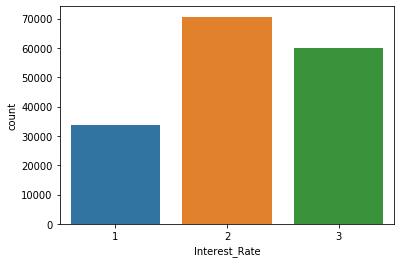

In [17]:
sns.countplot(df_bank_train['Interest_Rate'])
plt.show()

# checking for correlation

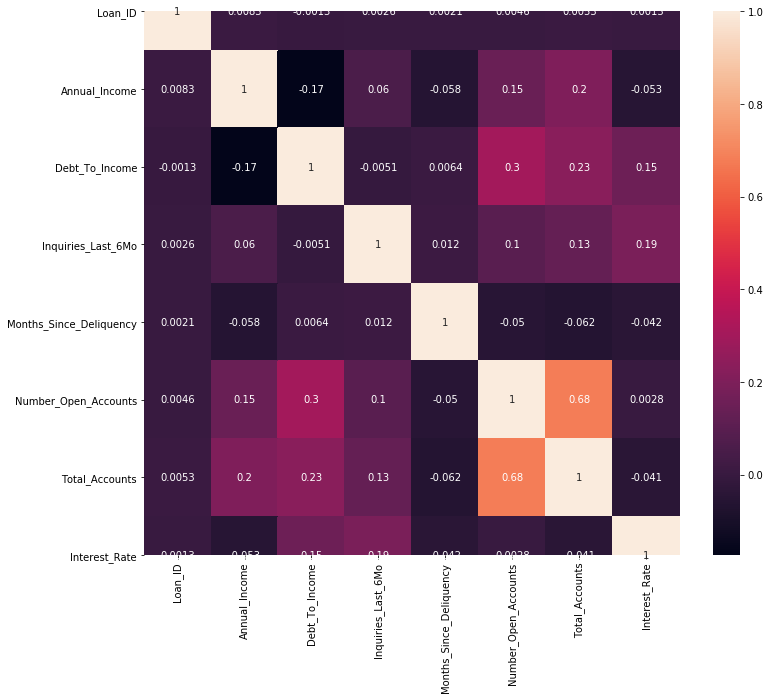

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df_bank_train.corr(),annot=True)
plt.show()

# subplots

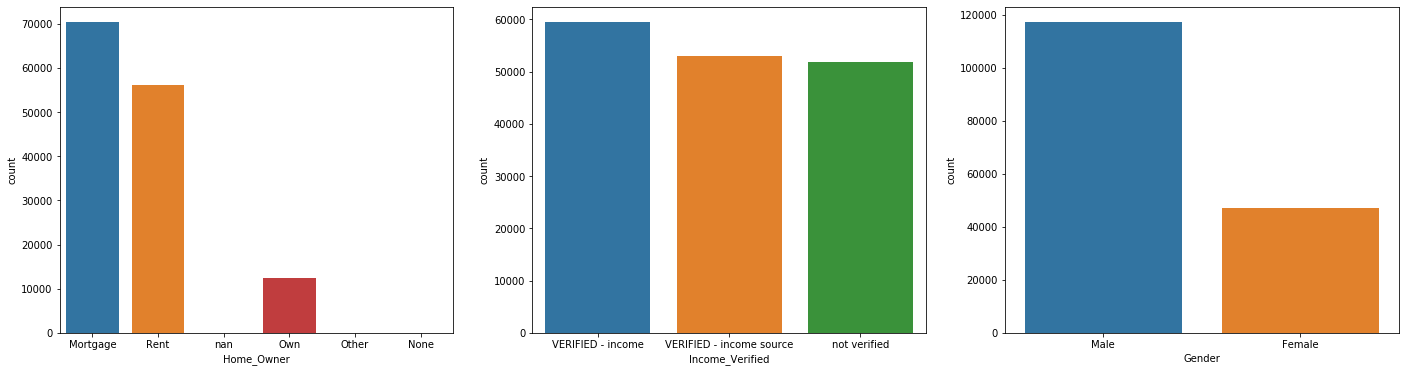

In [19]:
plt.figure(figsize=(24,6))
plt.subplot(131)
sns.countplot(df_bank_train['Home_Owner'],order=df_bank_train['Home_Owner'].value_counts(dropna=False).index)
plt.subplot(132)
sns.countplot(df_bank_train['Income_Verified'],order=df_bank_train['Income_Verified'].value_counts(dropna=False).index)
plt.subplot(133)
sns.countplot(df_bank_train['Gender'],order=df_bank_train['Gender'].value_counts(dropna=False).index)
plt.show()

In [20]:
df_bank_train['Home_Owner'].value_counts(dropna=False,normalize=True)

Mortgage    0.428126
Rent        0.341010
NaN         0.154276
Own         0.076228
Other       0.000298
None        0.000061
Name: Home_Owner, dtype: float64

In [21]:
df_bank_test['Home_Owner'].value_counts(dropna=False,normalize=True)

Mortgage    0.428378
Rent        0.342438
NaN         0.152555
Own         0.076264
Other       0.000274
None        0.000091
Name: Home_Owner, dtype: float64

In [22]:
df_bank_train['Home_Owner'].fillna('unknown',inplace=True)

In [23]:
df_bank_test['Home_Owner'].fillna('unknown',inplace=True)

In [24]:
df_bank_train['Months_Since_Deliquency'].value_counts(dropna=False,normalize=True)

NaN      0.537883
9.0      0.009239
10.0     0.009190
14.0     0.009050
12.0     0.009032
           ...   
119.0    0.000006
95.0     0.000006
148.0    0.000006
170.0    0.000006
141.0    0.000006
Name: Months_Since_Deliquency, Length: 123, dtype: float64

In [25]:
df_bank_test['Months_Since_Deliquency'].value_counts(dropna=False,normalize=True)

NaN      0.537324
9.0      0.009741
13.0     0.009677
8.0      0.009503
12.0     0.009029
           ...   
133.0    0.000009
143.0    0.000009
109.0    0.000009
99.0     0.000009
124.0    0.000009
Name: Months_Since_Deliquency, Length: 116, dtype: float64

In [26]:
pd.set_option('display.max_rows',None)

In [27]:
# more than 50 % of the feature has missing values ,

In [28]:
df_bank_train['Months_Since_Deliquency'].fillna(9999,inplace=True)

In [29]:
df_bank_test['Months_Since_Deliquency'].fillna(9999,inplace=True)

# checking for null values in annual income feature

In [30]:
df_bank_train['Annual_Income'].value_counts(dropna=False,normalize=True)

NaN           0.152773
60000.00      0.033242
50000.00      0.029110
65000.00      0.024417
40000.00      0.023468
70000.00      0.022318
45000.00      0.021995
75000.00      0.020900
80000.00      0.020869
55000.00      0.020206
90000.00      0.016049
100000.00     0.015933
85000.00      0.014467
35000.00      0.014302
30000.00      0.013682
120000.00     0.012057
42000.00      0.011594
52000.00      0.011326
48000.00      0.010870
110000.00     0.009622
72000.00      0.009446
95000.00      0.008587
36000.00      0.007395
150000.00     0.007249
62000.00      0.007139
38000.00      0.007090
54000.00      0.006506
32000.00      0.006421
58000.00      0.006372
125000.00     0.006165
56000.00      0.006129
25000.00      0.006117
105000.00     0.006019
68000.00      0.005995
43000.00      0.005818
130000.00     0.005788
53000.00      0.005222
78000.00      0.005051
46000.00      0.004759
140000.00     0.004729
63000.00      0.004698
115000.00     0.004698
47000.00      0.004619
44000.00   

In [31]:
df_bank_test['Annual_Income'].value_counts(dropna=False,normalize=True)

NaN           0.154262
60000.00      0.032070
50000.00      0.029021
65000.00      0.023909
40000.00      0.023096
70000.00      0.022631
45000.00      0.021882
80000.00      0.021198
55000.00      0.020102
75000.00      0.020075
90000.00      0.016186
100000.00     0.015474
85000.00      0.014780
35000.00      0.014260
30000.00      0.013356
120000.00     0.011594
42000.00      0.011539
48000.00      0.010909
52000.00      0.010845
110000.00     0.010434
95000.00      0.008983
72000.00      0.008946
36000.00      0.008189
38000.00      0.007358
62000.00      0.007258
150000.00     0.006865
32000.00      0.006765
68000.00      0.006491
56000.00      0.006472
54000.00      0.006336
58000.00      0.006126
25000.00      0.006089
130000.00     0.005760
105000.00     0.005760
78000.00      0.005715
43000.00      0.005706
125000.00     0.005623
53000.00      0.005487
46000.00      0.005085
115000.00     0.004765
63000.00      0.004720
140000.00     0.004519
82000.00      0.004409
57000.00   

# fill the annual income features missing values with mean

In [32]:
df_bank_train['Annual_Income'].fillna(df_bank_train['Annual_Income'].mean(),inplace=True)

In [33]:
df_bank_test['Annual_Income'].fillna(df_bank_train['Annual_Income'].mean(),inplace=True)

In [34]:
df_bank_train['Annual_Income']=np.log(df_bank_train['Annual_Income'])

In [35]:
df_bank_test['Annual_Income']=np.log(df_bank_test['Annual_Income'])

# checking the distribution of annula income feature

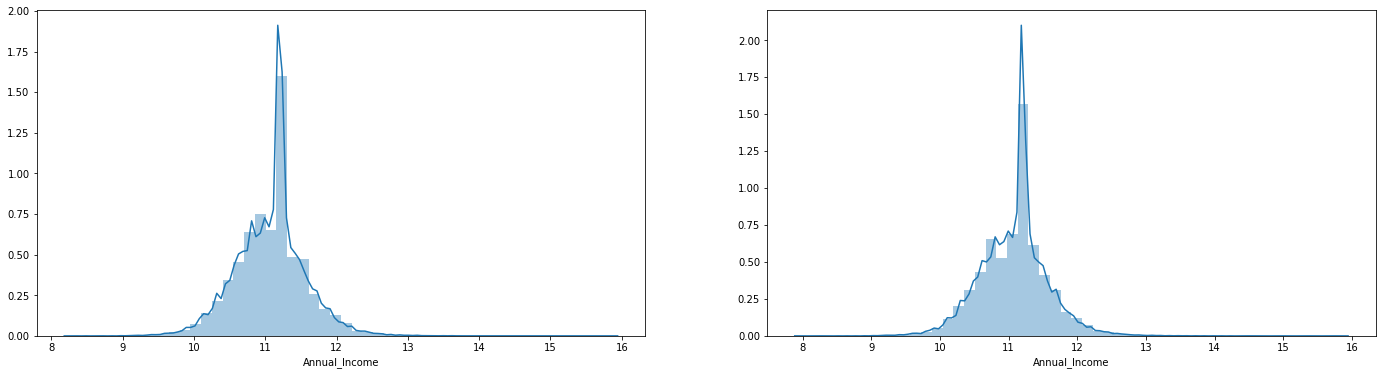

In [36]:
plt.figure(figsize=(24,6))
plt.subplot(121)
sns.distplot(df_bank_train['Annual_Income'])
plt.subplot(122)
sns.distplot(df_bank_test['Annual_Income'])
plt.show()

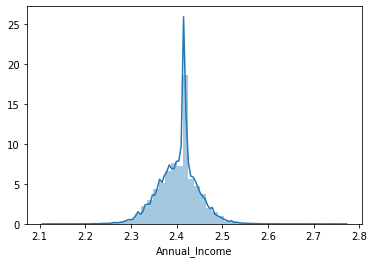

In [37]:
sns.distplot(np.log(df_bank_train['Annual_Income']))
plt.show()

In [38]:
df_bank_train['Annual_Income'].fillna(df_bank_train['Annual_Income'].median,inplace=True)

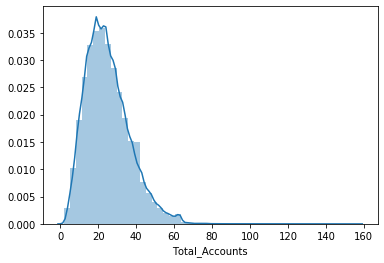

In [39]:
sns.distplot(df_bank_train['Total_Accounts'])
plt.show()

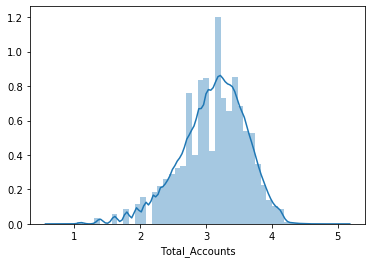

In [40]:
sns.distplot(np.log(df_bank_train['Total_Accounts']))
plt.show()

# checking for the missing values in length employed feature

In [41]:
df_bank_train['Length_Employed'].value_counts(dropna=False,normalize=True)

10+ years    0.322046
2 years      0.088979
3 years      0.078961
< 1 year     0.077932
5 years      0.065815
1 year       0.063429
4 years      0.059546
7 years      0.056649
6 years      0.055347
8 years      0.048184
NaN          0.044861
9 years      0.038251
Name: Length_Employed, dtype: float64

In [42]:
df_bank_test['Length_Employed'].value_counts(dropna=False,normalize=True)

10+ years    0.323285
2 years      0.089464
3 years      0.077633
< 1 year     0.076026
5 years      0.065984
1 year       0.063118
4 years      0.060334
6 years      0.057120
7 years      0.056016
8 years      0.047453
NaN          0.045061
9 years      0.038506
Name: Length_Employed, dtype: float64

# fill the length employed feature with 99

In [43]:
df_bank_train['Length_Employed'].fillna(99,inplace=True)

In [44]:
df_bank_test['Length_Employed'].fillna(99,inplace=True)

In [45]:
df_bank_train['Length_Employed'].replace({'10+ years':'10 years','< 1 year':'1 year'},inplace=True)

In [46]:
df_bank_test['Length_Employed'].replace({'10+ years':'10 years','< 1 year':'1 year'},inplace=True)

In [47]:
import re

In [48]:
df_bank_train['Length_Employed']=df_bank_train['Length_Employed'].apply(lambda x: ''.join(re.findall('\d+',str(x))))

In [49]:
df_bank_test['Length_Employed']=df_bank_test['Length_Employed'].apply(lambda x: ''.join(re.findall('\d+',str(x))))

In [50]:
df_bank_train['Length_Employed'].dtype

dtype('O')

### convert the object data type into int type

In [51]:
df_bank_train['Length_Employed']=df_bank_train['Length_Employed'].astype(int)

In [52]:
df_bank_test['Length_Employed']=df_bank_test['Length_Employed'].astype(int)

# checking the distribution of the feature loan amount requested

In [53]:
df_bank_train['Loan_Amount_Requested'].dtype

dtype('O')

In [54]:
df_bank_train['Loan_Amount_Requested']=df_bank_train['Loan_Amount_Requested'].apply(lambda x:x.replace(',',''))

In [55]:
df_bank_test['Loan_Amount_Requested']=df_bank_test['Loan_Amount_Requested'].apply(lambda x:x.replace(',',''))

In [56]:
df_bank_train['Loan_Amount_Requested']=df_bank_train['Loan_Amount_Requested'].astype(int)

In [57]:
df_bank_test['Loan_Amount_Requested']=df_bank_test['Loan_Amount_Requested'].astype(int)

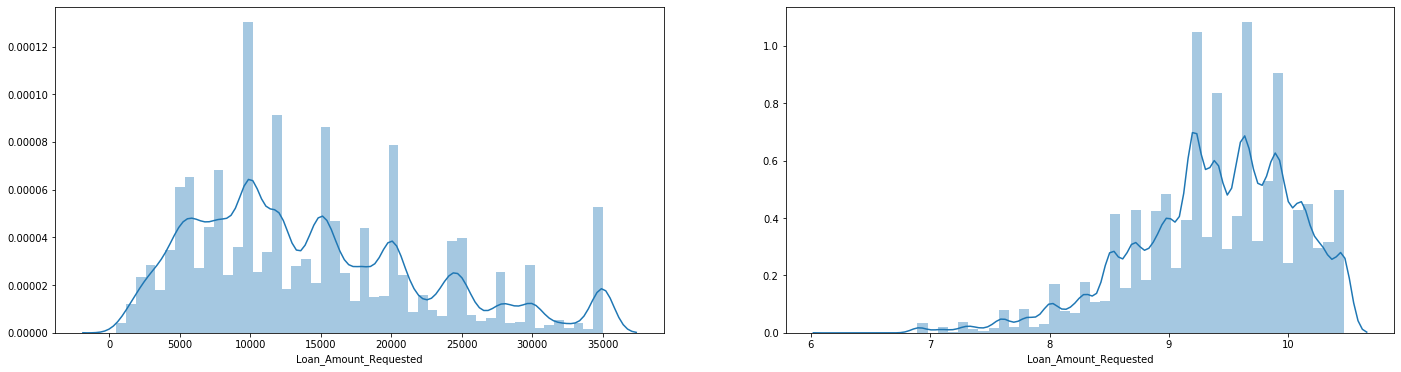

In [58]:
plt.figure(figsize=(24,6))
plt.subplot(121)
sns.distplot(df_bank_train['Loan_Amount_Requested'])
plt.subplot(122)
sns.distplot(np.log(df_bank_train['Loan_Amount_Requested']))
plt.show()


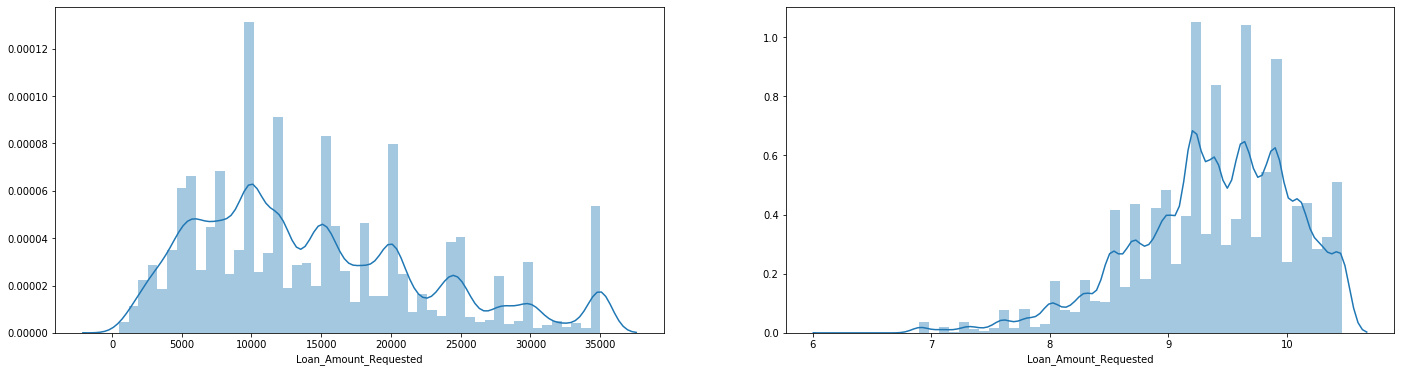

In [59]:
plt.figure(figsize=(24,6))
plt.subplot(121)
sns.distplot(df_bank_test['Loan_Amount_Requested'])
plt.subplot(122)
sns.distplot(np.log(df_bank_test['Loan_Amount_Requested']))
plt.show()


In [60]:
df_bank_train.shape

(164309, 14)

In [61]:
df_bank_test.shape

(109541, 13)

# seperating categorical columns

In [62]:
cat_columns_train=df_bank_train.select_dtypes('object').columns.tolist()

In [63]:
cat_columns_test=df_bank_test.select_dtypes('object').columns.tolist()

In [64]:
cat_columns_train.extend(['Length_Employed'])

In [65]:
cat_columns_test.extend(['Length_Employed'])

In [66]:
cat_columns_train

['Home_Owner',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Gender',
 'Length_Employed']

In [67]:
num_columns=df_bank_train.select_dtypes('int64','float64')

In [68]:
num_columns.columns

Index(['Loan_ID', 'Inquiries_Last_6Mo', 'Number_Open_Accounts',
       'Total_Accounts', 'Interest_Rate'],
      dtype='object')

In [69]:
df_bank_train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [70]:
df_bank_train.dtypes.value_counts()

int64      5
object     4
float64    3
int32      2
dtype: int64

In [71]:
df_bank_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,1,Rent,11.127263,not verified,car,18.37,0,9999.0,9,14,Female,1
1,10000002,30000,4,Mortgage,11.202741,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7,Mortgage,11.232767,VERIFIED - income source,debt_consolidation,15.88,0,9999.0,12,16,Male,3
3,10000004,16000,1,unknown,10.935960,VERIFIED - income source,debt_consolidation,14.34,3,9999.0,16,22,Male,3
4,10000005,17000,8,Own,11.472103,VERIFIED - income source,debt_consolidation,22.17,1,9999.0,19,30,Female,1


# model_building

# converting X and Y values

In [72]:
X_train=df_bank_train.drop(['Interest_Rate'],axis=1).values

In [73]:
Y=df_bank_train['Interest_Rate'].values

In [74]:
X_test=df_bank_test.values

In [75]:
X_train.shape,Y.shape,X_test.shape

((164309, 13), (164309,), (109541, 13))

In [76]:
#df_bank_train.to_csv('train_bank.csv',index = False)

In [77]:
#df_bank_test.to_csv('test_bank.csv',index = False)

# performing validation

In [78]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold

In [79]:
from imblearn.over_sampling import SMOTE

In [77]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement catboost (from versions: none)
ERROR: No matching distribution found for catboost


In [79]:
from catboost import CatBoostClassifier

In [ ]:
#pip install imblearn

In [ ]:
kfold,scores=KFold(n_splits=5,shuffle=True),list()

In [ ]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    model = CatBoostClassifier(random_state=27, max_depth=4, task_type="GPU", devices="0:1", n_estimators=1000, verbose=500)
    model.fit(x_train, y_train, cat_features=[2, 3, 5, 6, 12])
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))
    

# # predictions using catboost classifier

In [ ]:

model = CatBoostClassifier(random_state=27, task_type="GPU", devices="0:1", n_estimators=1000, max_depth=4, verbose=500)
model.fit(X_train, Y, cat_features=[2, 3, 5, 6, 12])
preds1 = model.predict_proba(X_test)

# # check feature importance

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index=df_bank_train.drop(["Interest_Rate"], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# classification report

In [1]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(Y, preds1))

NameError: name 'preds1' is not defined